In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras import models
import numpy as np
import os
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
data_dir =  "/home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data"
images_dir = os.path.join(data_dir,"images")
mask_dir = os.path.join(data_dir,"annotations/trimaps")
input_img_paths =sorted([os.path.join(images_dir , fname )for fname in os.listdir(images_dir) if fname.endswith(".jpg")])
target_img_paths = sorted([os.path.join(mask_dir , fname) for fname in os.listdir(mask_dir) if fname.endswith(".png") and not fname.startswith(".")])

In [3]:
for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

/home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data/images/Abyssinian_1.jpg | /home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data/annotations/trimaps/Abyssinian_1.png
/home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data/images/Abyssinian_10.jpg | /home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data/annotations/trimaps/Abyssinian_10.png
/home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data/images/Abyssinian_100.jpg | /home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data/annotations/trimaps/Abyssinian_100.png
/home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDeepLearning/UnetModelwithOxfordPetsDataset/Data/images/Abyssinian_101.jpg | /home/yagiz_dev/Notebooks/source/VSCodeProjects/GithubDe

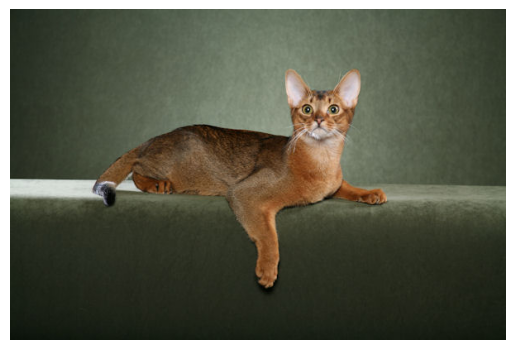

In [4]:
plt.axis("off")
plt.imshow(load_img(input_img_paths[0]))

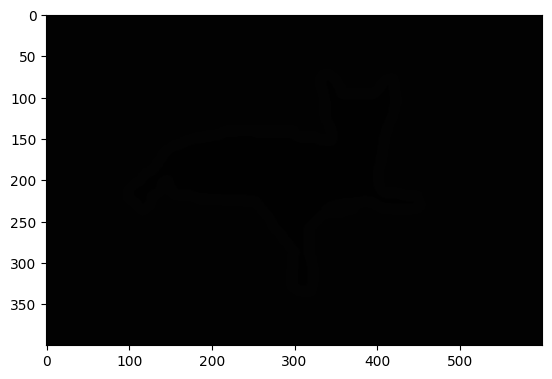

In [5]:
plt.imshow(load_img(target_img_paths[0]))

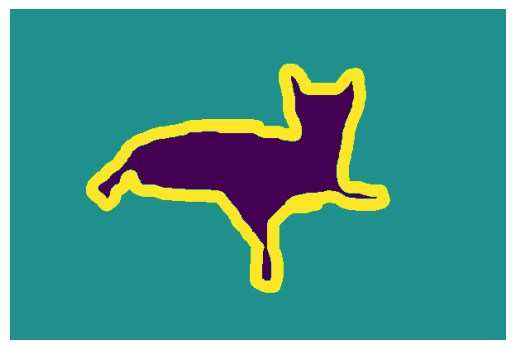

In [6]:
def show_mask(mask):
    normalize_mask = (mask.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalize_mask[:,:,0])

mask = load_img(target_img_paths[0])
mask = img_to_array(mask)
show_mask(mask)

In [7]:
def build_unet(input_size=(160,160),num_classes=3):
    inputs = tf.keras.layers.Input(shape = input_size +(3,))
    x = tf.keras.layers.Rescaling(1./255)(inputs)
    
    x =  tf.keras.layers.Conv2D(64 ,3 , strides = 2 , padding ="same" , activation = "relu")(x)
    x = tf.keras.layers.Conv2D(64 , 3 , padding ="same" , activation = "relu")(x)
    
    x =  tf.keras.layers.Conv2D(128 ,3 , strides = 2 , padding ="same" , activation = "relu")(x)
    x = tf.keras.layers.Conv2D(128 , 3 , padding ="same" , activation = "relu")(x)
    
    x =  tf.keras.layers.Conv2D(256 ,3 , strides = 2 , padding ="same" , activation = "relu")(x)
    x = tf.keras.layers.Conv2D(256 , 3 , padding ="same" , activation = "relu")(x)
    
    
    x = tf.keras.layers.Conv2DTranspose(256 , 3 , padding ="same" , activation ="relu")(x)
    x = tf.keras.layers.Conv2DTranspose(256 , 3 , padding ="same" , activation ="relu" , strides =2 )(x)
    
    
    x = tf.keras.layers.Conv2DTranspose(128 , 3 , padding ="same" , activation ="relu")(x)
    x = tf.keras.layers.Conv2DTranspose(128 , 3 , padding ="same" , activation ="relu" , strides =2 )(x)
    
    
    x = tf.keras.layers.Conv2DTranspose(64 , 3 , padding ="same" , activation ="relu")(x)
    x = tf.keras.layers.Conv2DTranspose(64 , 3 , padding ="same" , activation ="relu" , strides =2 )(x)
    
    outputs = tf.keras.layers.Conv2D(num_classes , 3 , padding ="same" , activation ="softmax")(x)
    
    model = tf.keras.Model(inputs ,outputs)
    return model    
Unet = build_unet() 

I0000 00:00:1732905958.990339   90753 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3588 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
Unet.compile(optimizer="adam",metrics=["acc"],loss="binary_crossentropy")

In [9]:
Unet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 80, 80, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 20, 20, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 40, 40, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 40, 40, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 80, 80, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 80, 80, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 160, 160, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 160, 160, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,880,643 (10.99 MB)

 Trainable params: 2,880,643 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def path_to_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img , channels=3)
    img = tf.image.resize(img , (160,160))
    img = tf.cast(img , tf.float32)
    return img 

In [11]:
def path_to_target(path):
    img = tf.io.read_file(path )
    img = tf.image.decode_png(img ,channels=1 )
    img = tf.image.resize(img , (160,160))
    img = tf.cast(img , tf.uint8) - 1
    return img 

In [12]:
def map_fn(img_path , target_path):
    img = path_to_img(img_path)
    mask = path_to_target(target_path)
    return img , mask

In [13]:
num_valid_samples =1000
train_dataset = tf.data.Dataset.from_tensor_slices((input_img_paths[:-num_valid_samples] , 
                                                   target_img_paths[:-num_valid_samples]))

valid_dataset = tf.data.Dataset.from_tensor_slices((input_img_paths[-num_valid_samples:] , 
                                                   target_img_paths[-num_valid_samples:]))

In [14]:
train_dataset = train_dataset.map(map_fn).batch(64).prefetch(1)
valid_dataset = valid_dataset.map(map_fn).batch(64).prefetch(1)

In [15]:
Unet.compile(optimizer ="rmsprop" , 
             loss ="sparse_categorical_crossentropy",metrics=["acc"])

In [16]:
callbacks = [tf.keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only = True)]

In [17]:
history = Unet.fit(train_dataset , epochs =50 , callbacks =callbacks , validation_data = valid_dataset,batch_size=8)

Epoch 1/50


I0000 00:00:1732905961.272410   90861 service.cc:148] XLA service 0x7efad4010f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732905961.272458   90861 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-29 21:46:01.348088: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
W0000 00:00:1732905961.384246   90861 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1732905961.553768   90861 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-29 21:46:10.224750: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,161,161]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,80,80]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}), windo

 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - acc: 0.5431 - loss: 1.0096

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - acc: 0.5453 - loss: 1.0039

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - acc: 0.5613 - loss: 0.9737

W0000 00:00:1732906020.924871   90861 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - acc: 0.5615 - loss: 0.9733

2024-11-29 21:47:30.238188: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_transpose_fusion', 16 bytes spill stores, 16 bytes spill loads

W0000 00:00:1732906050.774572   90861 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
W0000 00:00:1732906054.358971   90861 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 644ms/step - acc: 0.5617 - loss: 0.9729 - val_acc: 0.6320 - val_loss: 0.8837
Epoch 2/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - acc: 0.5713 - loss: 0.9117

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - acc: 0.5713 - loss: 0.9104

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - acc: 0.5771 - loss: 0.8940 - val_acc: 0.6320 - val_loss: 0.8024
Epoch 3/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - acc: 0.6108 - loss: 0.8478

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - acc: 0.6116 - loss: 0.8480

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - acc: 0.6190 - loss: 0.8380 - val_acc: 0.6424 - val_loss: 0.8233
Epoch 4/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - acc: 0.6448 - loss: 0.8261

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - acc: 0.6462 - loss: 0.8252

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - acc: 0.6564 - loss: 0.8126 - val_acc: 0.6874 - val_loss: 0.7536
Epoch 5/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 256ms/step - acc: 0.6786 - loss: 0.7976

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - acc: 0.6795 - loss: 0.7963

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - acc: 0.6848 - loss: 0.7860 - val_acc: 0.7093 - val_loss: 0.7151
Epoch 6/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.6911 - loss: 0.7684

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - acc: 0.6915 - loss: 0.7679

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.6953 - loss: 0.7616 - val_acc: 0.6745 - val_loss: 0.8038
Epoch 7/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - acc: 0.6841 - loss: 0.7785

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - acc: 0.6851 - loss: 0.7764

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - acc: 0.6931 - loss: 0.7594 - val_acc: 0.7010 - val_loss: 0.7336
Epoch 8/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - acc: 0.6933 - loss: 0.7591

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - acc: 0.6940 - loss: 0.7573

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - acc: 0.7019 - loss: 0.7395 - val_acc: 0.7067 - val_loss: 0.7043
Epoch 9/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.7096 - loss: 0.7171

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - acc: 0.7103 - loss: 0.7157

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - acc: 0.7168 - loss: 0.7019 - val_acc: 0.7096 - val_loss: 0.6910
Epoch 10/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - acc: 0.7112 - loss: 0.7110

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - acc: 0.7117 - loss: 0.7101

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.7193 - loss: 0.6943 - val_acc: 0.7440 - val_loss: 0.6360
Epoch 11/50
 43/100 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - acc: 0.7207 - loss: 0.6963

Corrupt JPEG data: premature end of data segment


 49/100 ━━━━━━━━━━━━━━━━━━━━ 12s 239ms/step - acc: 0.7212 - loss: 0.6946

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.7285 - loss: 0.6750 - val_acc: 0.7221 - val_loss: 0.6598
Epoch 12/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.7242 - loss: 0.6737

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.7251 - loss: 0.6721

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.7333 - loss: 0.6559 - val_acc: 0.7003 - val_loss: 0.7086
Epoch 13/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - acc: 0.7216 - loss: 0.6929

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - acc: 0.7231 - loss: 0.6888

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - acc: 0.7345 - loss: 0.6605 - val_acc: 0.7260 - val_loss: 0.6723
Epoch 14/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - acc: 0.7399 - loss: 0.6520

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - acc: 0.7407 - loss: 0.6495

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.7487 - loss: 0.6289 - val_acc: 0.7472 - val_loss: 0.6142
Epoch 15/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - acc: 0.7462 - loss: 0.6293

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - acc: 0.7465 - loss: 0.6285

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - acc: 0.7531 - loss: 0.6138 - val_acc: 0.7262 - val_loss: 0.6639
Epoch 16/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.7516 - loss: 0.6194

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.7525 - loss: 0.6170

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.7609 - loss: 0.5969 - val_acc: 0.7301 - val_loss: 0.6589
Epoch 17/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 243ms/step - acc: 0.7570 - loss: 0.6092

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - acc: 0.7577 - loss: 0.6070

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - acc: 0.7656 - loss: 0.5873 - val_acc: 0.7459 - val_loss: 0.6293
Epoch 18/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - acc: 0.7667 - loss: 0.5854

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - acc: 0.7674 - loss: 0.5832

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - acc: 0.7749 - loss: 0.5646 - val_acc: 0.7764 - val_loss: 0.5556
Epoch 19/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - acc: 0.7738 - loss: 0.5671

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - acc: 0.7743 - loss: 0.5657

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.7811 - loss: 0.5502 - val_acc: 0.7736 - val_loss: 0.5660
Epoch 20/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.7773 - loss: 0.5603

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.7778 - loss: 0.5588

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - acc: 0.7846 - loss: 0.5422 - val_acc: 0.7911 - val_loss: 0.5266
Epoch 21/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.7875 - loss: 0.5381

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.7879 - loss: 0.5371

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.7935 - loss: 0.5239 - val_acc: 0.7766 - val_loss: 0.5578
Epoch 22/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.7889 - loss: 0.5327

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.7894 - loss: 0.5316

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 250ms/step - acc: 0.7956 - loss: 0.5169 - val_acc: 0.7697 - val_loss: 0.5798
Epoch 23/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - acc: 0.7931 - loss: 0.5255

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - acc: 0.7935 - loss: 0.5242

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.7990 - loss: 0.5101 - val_acc: 0.7287 - val_loss: 0.6770
Epoch 24/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - acc: 0.7878 - loss: 0.5416

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - acc: 0.7892 - loss: 0.5376

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.7991 - loss: 0.5123 - val_acc: 0.7364 - val_loss: 0.6470
Epoch 25/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - acc: 0.7981 - loss: 0.5111

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - acc: 0.7989 - loss: 0.5091

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - acc: 0.8061 - loss: 0.4919 - val_acc: 0.8014 - val_loss: 0.4945
Epoch 26/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - acc: 0.7985 - loss: 0.5097

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - acc: 0.7995 - loss: 0.5071

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - acc: 0.8077 - loss: 0.4876 - val_acc: 0.8139 - val_loss: 0.4748
Epoch 27/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.8095 - loss: 0.4876

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.8100 - loss: 0.4860

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - acc: 0.8155 - loss: 0.4718 - val_acc: 0.7941 - val_loss: 0.5050
Epoch 28/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - acc: 0.8145 - loss: 0.4770

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - acc: 0.8150 - loss: 0.4755

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.8198 - loss: 0.4635 - val_acc: 0.7503 - val_loss: 0.6376
Epoch 29/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.8099 - loss: 0.4896

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.8111 - loss: 0.4862

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.8191 - loss: 0.4653 - val_acc: 0.8030 - val_loss: 0.5078
Epoch 30/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.8171 - loss: 0.4639

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.8178 - loss: 0.4623

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.8232 - loss: 0.4510 - val_acc: 0.7962 - val_loss: 0.5171
Epoch 31/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - acc: 0.8195 - loss: 0.4625

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - acc: 0.8202 - loss: 0.4607

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - acc: 0.8266 - loss: 0.4446 - val_acc: 0.8149 - val_loss: 0.4710
Epoch 32/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - acc: 0.8283 - loss: 0.4405

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - acc: 0.8287 - loss: 0.4394

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.8328 - loss: 0.4298 - val_acc: 0.8066 - val_loss: 0.4957
Epoch 33/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - acc: 0.8269 - loss: 0.4452

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - acc: 0.8277 - loss: 0.4432

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.8339 - loss: 0.4276 - val_acc: 0.7841 - val_loss: 0.5516
Epoch 34/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.8286 - loss: 0.4416

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.8294 - loss: 0.4395

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - acc: 0.8352 - loss: 0.4250 - val_acc: 0.8338 - val_loss: 0.4277
Epoch 35/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - acc: 0.8342 - loss: 0.4275

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - acc: 0.8348 - loss: 0.4260

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - acc: 0.8392 - loss: 0.4150 - val_acc: 0.7885 - val_loss: 0.5249
Epoch 36/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - acc: 0.8327 - loss: 0.4296

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 241ms/step - acc: 0.8338 - loss: 0.4271

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - acc: 0.8397 - loss: 0.4124 - val_acc: 0.7666 - val_loss: 0.5902
Epoch 37/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - acc: 0.8264 - loss: 0.4448

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - acc: 0.8283 - loss: 0.4402

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.8385 - loss: 0.4153 - val_acc: 0.8215 - val_loss: 0.4577
Epoch 38/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - acc: 0.8432 - loss: 0.4052

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - acc: 0.8437 - loss: 0.4040

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - acc: 0.8482 - loss: 0.3922 - val_acc: 0.8352 - val_loss: 0.4336
Epoch 39/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.8429 - loss: 0.4092

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - acc: 0.8435 - loss: 0.4076

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.8488 - loss: 0.3929 - val_acc: 0.8230 - val_loss: 0.4515
Epoch 40/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.8422 - loss: 0.4069

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - acc: 0.8431 - loss: 0.4046

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - acc: 0.8494 - loss: 0.3888 - val_acc: 0.8277 - val_loss: 0.4621
Epoch 41/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - acc: 0.8370 - loss: 0.4228

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - acc: 0.8387 - loss: 0.4183

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.8476 - loss: 0.3948 - val_acc: 0.7232 - val_loss: 0.7217
Epoch 42/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - acc: 0.8388 - loss: 0.4175

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - acc: 0.8408 - loss: 0.4124

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - acc: 0.8511 - loss: 0.3861 - val_acc: 0.8416 - val_loss: 0.4103
Epoch 43/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.8535 - loss: 0.3788

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - acc: 0.8540 - loss: 0.3776

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.8587 - loss: 0.3656 - val_acc: 0.8334 - val_loss: 0.4423
Epoch 44/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - acc: 0.8532 - loss: 0.3804

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.8539 - loss: 0.3786

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.8594 - loss: 0.3642 - val_acc: 0.6777 - val_loss: 0.8772
Epoch 45/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - acc: 0.8348 - loss: 0.4375

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - acc: 0.8376 - loss: 0.4296

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - acc: 0.8518 - loss: 0.3893 - val_acc: 0.8410 - val_loss: 0.4318
Epoch 46/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 14s 256ms/step - acc: 0.8555 - loss: 0.3756

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - acc: 0.8564 - loss: 0.3732

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.8620 - loss: 0.3581 - val_acc: 0.8267 - val_loss: 0.4549
Epoch 47/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - acc: 0.8628 - loss: 0.3576

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - acc: 0.8633 - loss: 0.3560

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - acc: 0.8675 - loss: 0.3444 - val_acc: 0.8482 - val_loss: 0.4014
Epoch 48/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - acc: 0.8673 - loss: 0.3445

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - acc: 0.8675 - loss: 0.3442

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - acc: 0.8710 - loss: 0.3345 - val_acc: 0.8456 - val_loss: 0.4261
Epoch 49/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 243ms/step - acc: 0.8630 - loss: 0.3566

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - acc: 0.8639 - loss: 0.3542

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - acc: 0.8698 - loss: 0.3385 - val_acc: 0.8473 - val_loss: 0.4003
Epoch 50/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - acc: 0.8713 - loss: 0.3347

Corrupt JPEG data: premature end of data segment


 50/100 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - acc: 0.8715 - loss: 0.3341

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - acc: 0.8748 - loss: 0.3249 - val_acc: 0.8520 - val_loss: 0.4079


In [21]:
loss,acc=Unet.evaluate(valid_dataset)
print("Loss: ",loss)
print("Acc: ",acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - acc: 0.8510 - loss: 0.4094
Loss:  0.40794211626052856
Acc:  0.8520210385322571


In [23]:
def plot():
    epochs = range(1, len(history.history["loss"]) + 1)
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    plt.figure()
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    
    acc = history.history["loss"]
    val_acc = history.history["val_loss"]
    plt.figure()
    plt.plot(epochs, acc, "bo", label="Training loss")
    plt.plot(epochs, val_acc, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    
    plt.show()

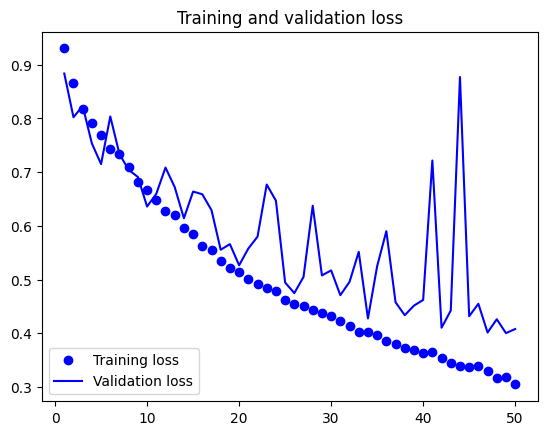

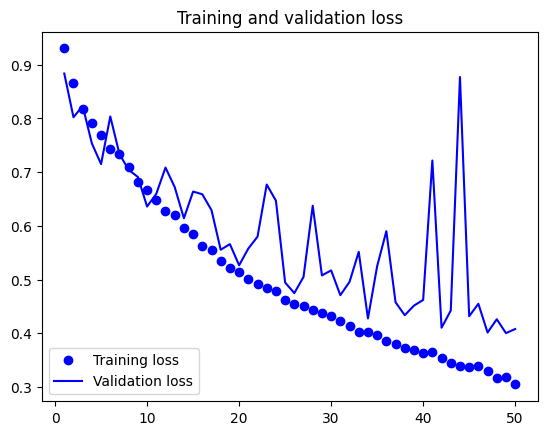

In [24]:
plot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


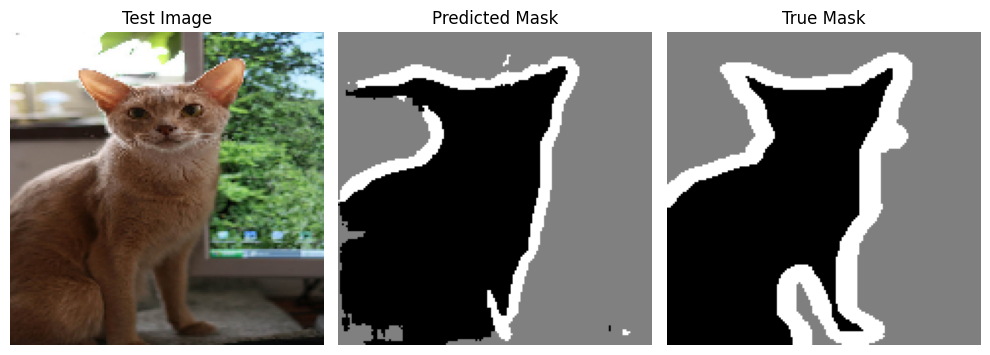

In [67]:

idx = 19
test_image = load_img(input_img_paths[idx], target_size=(160, 160))

model = tf.keras.models.load_model("oxford_segmentation.keras")
mask = model.predict(np.expand_dims(test_image, 0))[0]

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(array_to_img(test_image))
axes[0].axis("off")
axes[0].set_title("Test Image")

predicted_mask = np.argmax(mask, axis=-1)  
predicted_mask *= 127  
axes[1].imshow(predicted_mask, cmap="gray")
axes[1].axis("off")
axes[1].set_title("Predicted Mask")
mask_true = load_img(target_img_paths[idx], target_size=(160, 160))
axes[2].imshow(array_to_img(mask_true))
axes[2].axis("off")
axes[2].set_title("True Mask")

# Göster
plt.tight_layout()
plt.show()
